1.1 Importar librerias

In [80]:
%pip install seaborn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [81]:
%pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [82]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\danie\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (1.6.1)




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [83]:
%pip install spacy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [84]:
import spacy
spacy.info()


{'spacy_version': '3.8.4',
 'location': 'C:\\Users\\danie\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\spacy',
 'platform': 'Windows-10-10.0.22631-SP0',
 'python_version': '3.11.9',
 'pipelines': {'es_core_news_sm': '3.8.0'}}

In [85]:
!python -m spacy download es_core_news_sm


     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 660.6 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.9 MB 653.6 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.9 MB 804.6 kB/s eta 0:00:16
     --------------------------------------- 0.1/12.9 MB 804.6 kB/s eta 0:00:16
      --------------------------------------- 0.3/12.9 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/12.9 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.5/12.9 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.6/12.9 MB 1.7 MB/s eta 0:00:08
     -- ------------------------------------- 0.8/12.9 MB 1.9 MB/s eta 0:00:07
     --- ------------------------------------ 1.1/12.9 MB 2.4 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/12.9 MB 2.7 MB/s eta 0:00:05
     ----- ---------------------------------- 1.6/12.9 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\danie\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [86]:
import spacy
nlp = spacy.load("es_core_news_sm")
print("Modelo cargado correctamente")


Modelo cargado correctamente


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


**1.2 Cargar el data set**

*1.2.1 Data set de entrenamiento*

In [88]:
df_entrenamiento = pd.read_csv("fake_news_spanish.csv", delimiter=';')
df_entrenamiento.head()



,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018


*1.2.2 Data set de prueba*

El conocer algunos de los datos de 

In [89]:
df_prueba = pd.read_csv("fake_news_test.csv", delimiter=';')
df_prueba.head()

,ID,Titulo,Descripcion,Fecha
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021


**2. Entendimiento de los datos**

**2.1 Estadísticas Descriptivas de los datos** 

*2.1.1 Estadísticas Descriptivas de los datos de entrenamiento*

In [90]:
describe=df_entrenamiento.describe()
print(describe)

              Label
count  57063.000000
mean       0.581077
std        0.493387
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


*2.1.2 Estadísticas Descriptivas de los datos de prueba*

In [91]:
describe=df_prueba.describe()
print(describe)

          ID                                             Titulo  \
count   1000                                                999   
unique     1                                                997   
top       ID  La Junta Electoral multa con 1.000 euros a 'AB...   
freq    1000                                                  2   

                                              Descripcion       Fecha  
count                                                1000        1000  
unique                                                995         755  
top     La mayoría de los portavoces de los grupos de ...  24/06/2019  
freq                                                    2           5  


**2.2 Conteo de las clases en Label de los Datos de Entrenamiento**

In [92]:
label_count = df_entrenamiento['Label'].value_counts()
print(label_count)

Label
1    33158
0    23905
Name: count, dtype: int64


**2.3 Variables numéricas y categóricas**


*2.3.1-1 Variables numéricas para los datos de entrenamiento*

El saber la longitud del título y la descripción puede ser relevate para el análisis. Pues un título más largo podría ser una señal de que un artículo es más detallado o contiene en el más contexto. Ya que se busca analizar noticias falsas, la longitud dedl título podría ayudar a diferenciar entre títulos "informales" es decir más cortos y títulos más detallados, los culaes podrían ser más caracteristicos de ciertos tipos de contenidos. 

De la misma forma, las descripciones más largas podrían ser más informativas y detalladas, mientras que las descripciones cortas podrían ser características de resúmenes o contenido más superficial. En el contexto de este ejemplo, las descripciones breves pueden estar asociadas con información o incluso engañosa

In [93]:
df_entrenamiento['Fecha']=pd.to_datetime(df_entrenamiento['Fecha'], errors='coerce')
df_entrenamiento['longitud_titulo'] = df_entrenamiento['Titulo'].apply(lambda x: len(str(x)))
df_entrenamiento['longitud_descripcion'] = df_entrenamiento['Descripcion'].apply(lambda x: len(str(x)))


*2.3.1-2 Variables numéricas para los datos de prueba*

In [94]:
df_prueba['Fecha']=pd.to_datetime(df_prueba['Fecha'], errors='coerce')
df_prueba['longitud_titulo'] = df_prueba['Titulo'].apply(lambda x: len(str(x)))
df_prueba['longitud_descripcion'] = df_prueba['Descripcion'].apply(lambda x: len(str(x)))


C:\Users\danie\AppData\Local\Temp\ipykernel_15480\4132102996.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_prueba['Fecha']=pd.to_datetime(df_prueba['Fecha'], errors='coerce')


*2.3.2-1 Separar las variables categóricas y numéricas pra los datos de entrenamiento*

In [95]:
categoricas = ['Label', 'Titulo', 'Descripcion']
numericas = ['longitud_titulo', 'longitud_descripcion', 'Fecha']

*2.3.1-2 Separar las variables categóricas y numéricas para los datos de prueba*

In [96]:
categoricas = ['Label', 'Titulo', 'Descripcion']
numericas = ['longitud_titulo', 'longitud_descripcion', 'Fecha']

*2.3.3 Análisis de las variables categóricas*

1.1 Label para los datos de entrenamiento

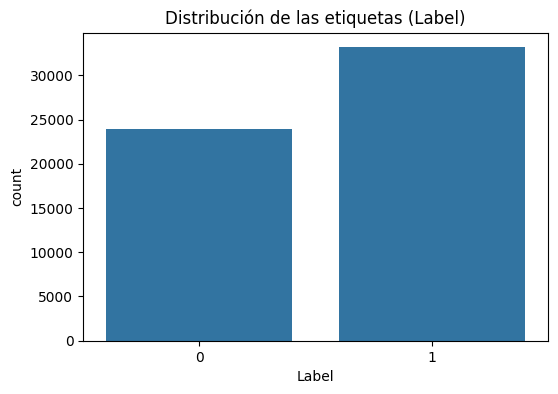

In [97]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df_entrenamiento)
plt.title('Distribución de las etiquetas (Label)')
plt.show()



*2.3.4 Análisis de las variables numéricas*

1. Longitud del Título

1.1 Longitud de Título para los datos de entrenamiento

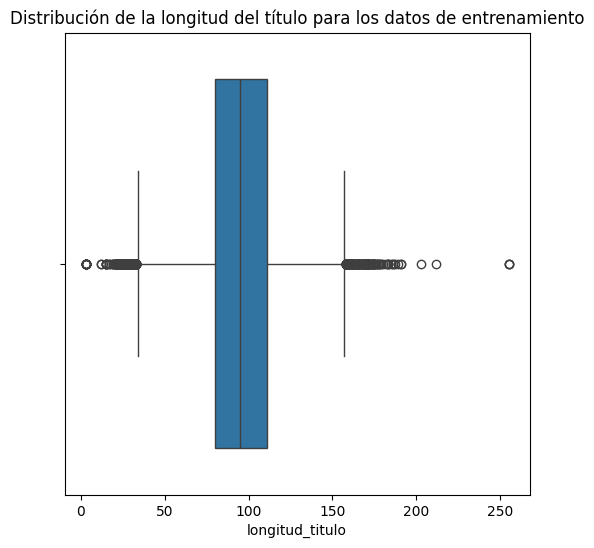

In [98]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df_entrenamiento['longitud_titulo'])
plt.title('Distribución de la longitud del título para los datos de entrenamiento')
plt.show()


1.2 Longitud de Título para los datos de Prueba

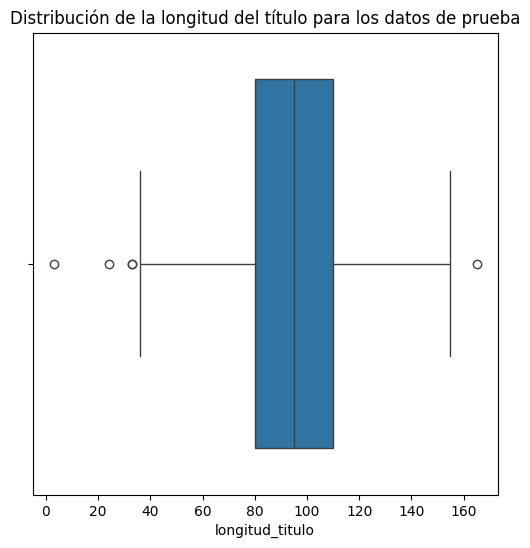

In [99]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df_prueba['longitud_titulo'])
plt.title('Distribución de la longitud del título para los datos de prueba')
plt.show()


2. Longitud de la Descripción

2.1 Longitud de la Descripción de los datos de Entrenamiento

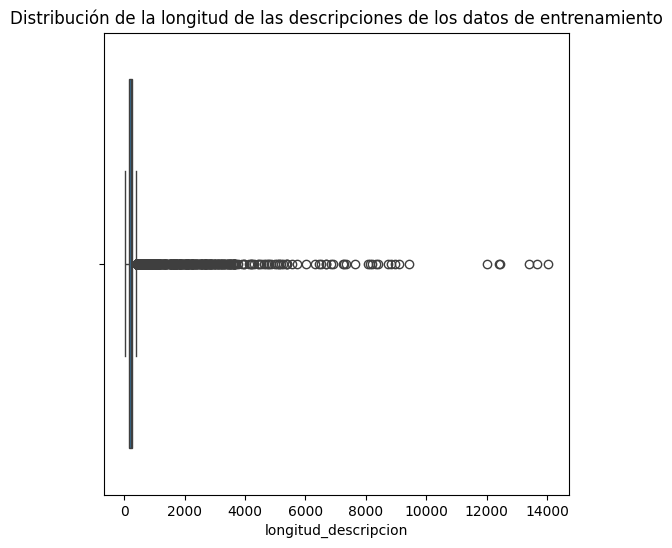

In [100]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df_entrenamiento['longitud_descripcion'])
plt.title('Distribución de la longitud de las descripciones de los datos de entrenamiento')
plt.show()



2.2 Longitud de la descripción de los datos de Prueba

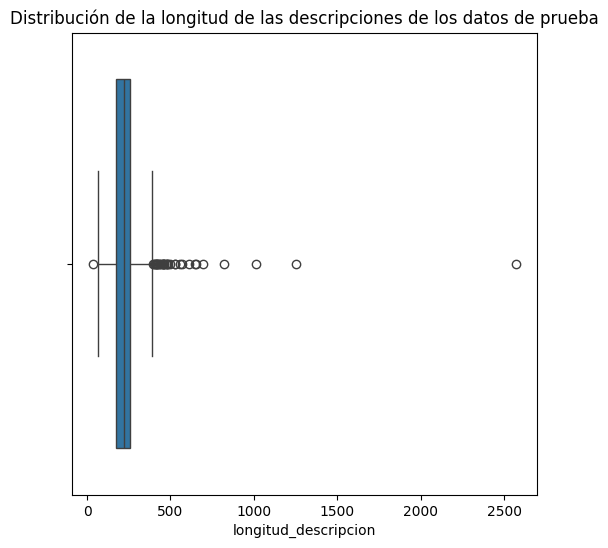

In [101]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df_prueba['longitud_descripcion'])
plt.title('Distribución de la longitud de las descripciones de los datos de prueba')
plt.show()



3. Fechas

3.1 Fechas para los datos de Entrenamiento

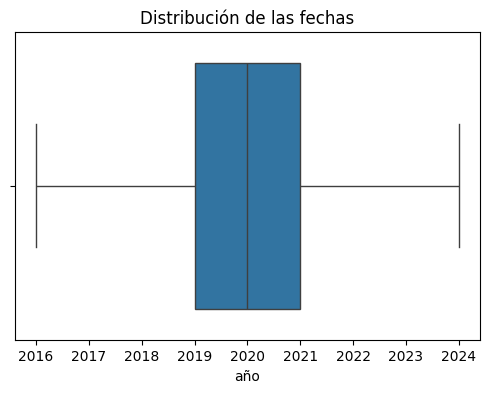

In [102]:
df_entrenamiento['año']=df_entrenamiento['Fecha'].dt.year
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_entrenamiento['año'])
plt.title('Distribución de las fechas')
plt.show()

3.2 Fechas para los datos de prueba

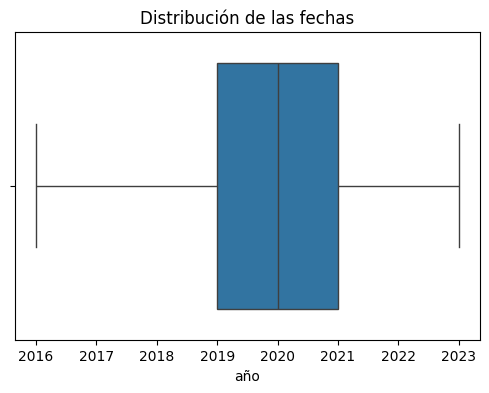

In [103]:
df_prueba['año']=df_prueba['Fecha'].dt.year
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_prueba['año'])
plt.title('Distribución de las fechas')
plt.show()

4. Estadísticas Descriptivas para las Variables Numéricas

4.1 Estadísticas Descriptivas para las variables numéricas para los datos de entrenamiento

In [104]:
info=df_entrenamiento[numericas].describe()
print(info)

       longitud_titulo  longitud_descripcion                          Fecha
count     57063.000000          57063.000000                          21740
mean         94.770254            243.448697  2020-08-03 05:41:15.289788416
min           3.000000             33.000000            2016-02-01 00:00:00
25%          80.000000            171.000000            2019-04-04 18:00:00
50%          95.000000            221.000000            2020-06-06 00:00:00
75%         111.000000            267.000000            2021-12-04 00:00:00
max         255.000000          14019.000000            2024-12-11 00:00:00
std          21.877908            273.253727                            NaN


4.2 Estadísticas Descriptivas para las Variables Numéricas para los datos de prueba

In [105]:
info=df_prueba[numericas].describe()
print(info)

       longitud_titulo  longitud_descripcion                          Fecha
count      1000.000000             1000.0000                           1000
mean         94.532000              230.6920  2020-07-23 01:29:16.800000256
min           3.000000               36.0000            2016-06-18 00:00:00
25%          80.000000              171.0000            2019-04-07 18:00:00
50%          95.000000              220.5000            2020-05-19 00:00:00
75%         110.000000              259.2500            2021-11-22 00:00:00
max         165.000000             2569.0000            2023-11-28 00:00:00
std          20.499835              120.1793                            NaN


5. Valores atípicos en la longitud de Título y Descripción

5.1 Detección de valores atípicos en la longitud de título y descripción de los datos de entrenamiento

Valores atípicos en la longitud del título: 57063
Valores atípicos en la longitud de la descripción: 15045


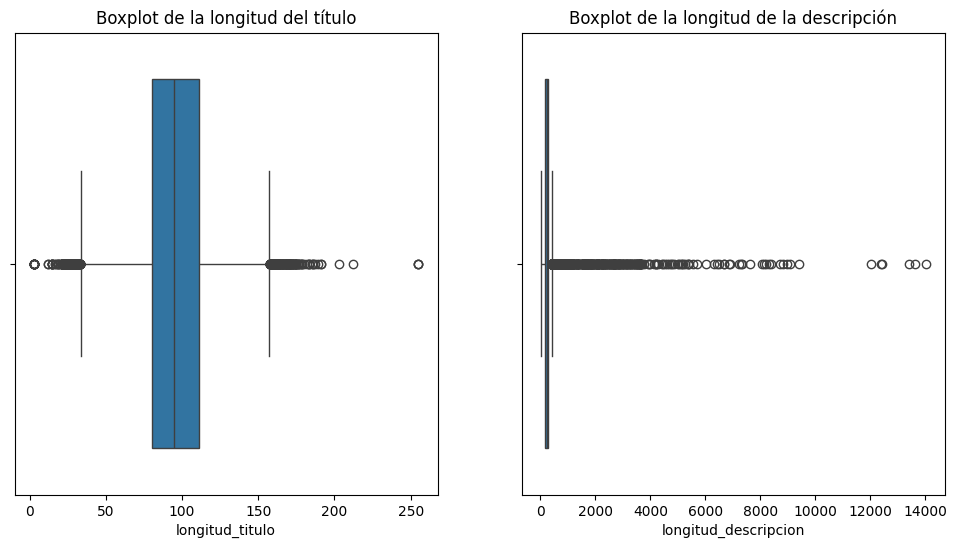

In [106]:
Q1_titulo = df_entrenamiento['longitud_titulo'].quantile(0.25)
Q3_titulo = df_entrenamiento['longitud_titulo'].quantile(0.75)
IQR_titulo = Q3_titulo - Q1_titulo

lim_inf_titulo = Q1_titulo - 1.5 * IQR_titulo
lim_inf_titulo = Q3_titulo + 1.5 * IQR_titulo
atipicos_titulo = df_entrenamiento[(df_entrenamiento['longitud_titulo'] < lim_inf_titulo) | (df_entrenamiento['longitud_titulo'] > lim_inf_titulo)]

#Longitud de la descripción
Q1_desc= df_entrenamiento['longitud_descripcion'].quantile(0.25)
Q3_desc = df_entrenamiento['longitud_descripcion'].quantile(0.75)
lim_inf_desc = Q1_desc - 1.5 * IQR_titulo
lim_sup_desc = Q3_desc + 1.5 * IQR_titulo
atipicos_desc = df_entrenamiento[(df_entrenamiento['longitud_descripcion'] < lim_inf_desc) | (df_entrenamiento['longitud_descripcion'] > lim_sup_desc)]

print(f"Valores atípicos en la longitud del título: {len(atipicos_titulo)}")
print(f"Valores atípicos en la longitud de la descripción: {len(atipicos_desc)}")

# Graficar boxplots para visualizar valores atípicos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_entrenamiento['longitud_titulo'])
plt.title("Boxplot de la longitud del título")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_entrenamiento['longitud_descripcion'])
plt.title("Boxplot de la longitud de la descripción")

plt.show()

5.2 Detección de Valores Atípicos de la Longitud de Título y Descripción de los datos de prueba


Valores atípicos en la longitud del título: 999
Valores atípicos en la longitud de la descripción: 258


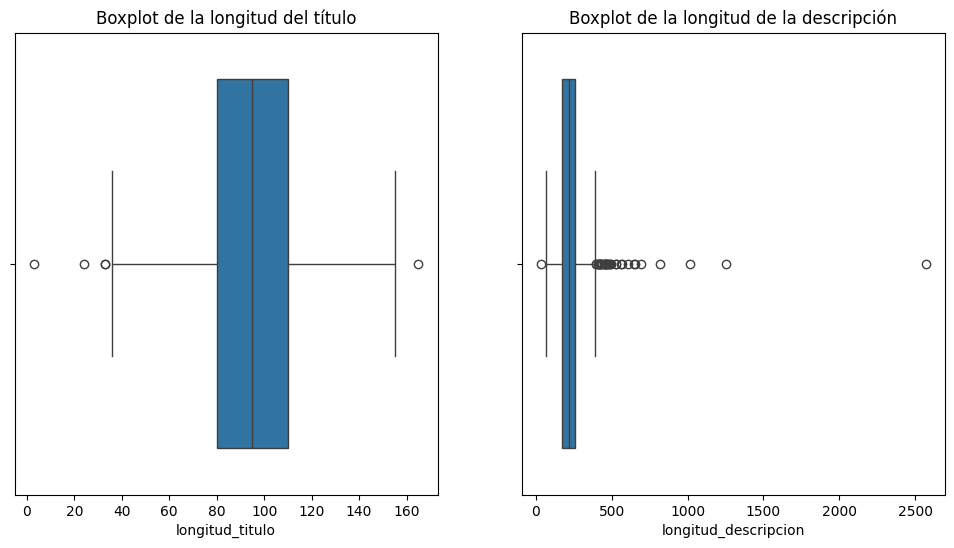

In [107]:
Q1_titulo = df_prueba['longitud_titulo'].quantile(0.25)
Q3_titulo = df_prueba['longitud_titulo'].quantile(0.75)
IQR_titulo = Q3_titulo - Q1_titulo

lim_inf_titulo = Q1_titulo - 1.5 * IQR_titulo
lim_inf_titulo = Q3_titulo + 1.5 * IQR_titulo
atipicos_titulo = df_prueba[(df_prueba['longitud_titulo'] < lim_inf_titulo) | (df_prueba['longitud_titulo'] > lim_inf_titulo)]

#Longitud de la descripción
Q1_desc= df_prueba['longitud_descripcion'].quantile(0.25)
Q3_desc = df_prueba['longitud_descripcion'].quantile(0.75)
lim_inf_desc = Q1_desc - 1.5 * IQR_titulo
lim_sup_desc = Q3_desc + 1.5 * IQR_titulo
atipicos_desc = df_prueba[(df_prueba['longitud_descripcion'] < lim_inf_desc) | (df_prueba['longitud_descripcion'] > lim_sup_desc)]

print(f"Valores atípicos en la longitud del título: {len(atipicos_titulo)}")
print(f"Valores atípicos en la longitud de la descripción: {len(atipicos_desc)}")

# Graficar boxplots para visualizar valores atípicos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_prueba['longitud_titulo'])
plt.title("Boxplot de la longitud del título")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_prueba['longitud_descripcion'])
plt.title("Boxplot de la longitud de la descripción")

plt.show()

6. Valores atípicos en las fechas

6.1 Valores atípicos en las fechas de los datos de entrenamiento

In [108]:
lim_inf_fecha = df_entrenamiento['año'].min()-1
lim_sup_fecha = df_entrenamiento['año'].max()+1
atipicos_fecha = df_entrenamiento[(df_entrenamiento['año'] < lim_inf_fecha) | (df_entrenamiento['año'] > lim_sup_fecha)]
print(f"Valores atípicos en la fecha: {len(atipicos_fecha)}")

Valores atípicos en la fecha: 0


6.2 Valores atípicos en las fechas de los datos de prueba

In [109]:
lim_inf_fecha = df_prueba['año'].min()-1
lim_sup_fecha = df_prueba['año'].max()+1
atipicos_fecha = df_prueba[(df_prueba['año'] < lim_inf_fecha) | (df_prueba['año'] > lim_sup_fecha)]
print(f"Valores atípicos en la fecha: {len(atipicos_fecha)}")

Valores atípicos en la fecha: 0


7. Resumen de las variables

7.1 Resumen de las variables de los datos de entrenamiento

In [110]:
# Resumen
print("\nResumen de las variables:")
print("Variables categóricas: Label, Titulo, Descripcion")
print("Variables numéricas: longitud_titulo, longitud_descripcion, año")

# Mostrar algunas muestras de los valores atípicos
print("\nMuestras de valores atípicos en longitud_titulo:")
print(atipicos_titulo.head())

print("\nMuestras de valores atípicos en longitud_descripcion:")
print(atipicos_desc.head())

print("\nMuestras de valores atípicos en fechas:")
print(atipicos_fecha.head())


Resumen de las variables:
Variables categóricas: Label, Titulo, Descripcion
Variables numéricas: longitud_titulo, longitud_descripcion, año

Muestras de valores atípicos en longitud_titulo:
   ID                                             Titulo  \
0  ID  La mesa del congreso censura un encuentro inte...   
1  ID  La brecha digital que dificulta el acceso de a...   
2  ID  PP apremia al EQUO a presentar una propuesta d...   
3  ID  De soberano garante de la democracia a rey cor...   
4  ID  El Gobierno aprobará este martes detraer los b...   

                                         Descripcion      Fecha  \
0  Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid... 2018-10-30   
1  No es la primera vez que los ciudadanos vulner... 2023-03-15   
2  El partido morado reprocha que los socialistas... 2019-07-01   
3  La renuncia de Felipe VI a su herencia, proced... 2020-03-16   
4  El Ejecutivo también prorrogará la suspensión ... 2021-09-13   

   longitud_titulo  longitud_descripcion   añ

7.2 Resumen de las variables de los datos de prueba

In [111]:
# Resumen
print("\nResumen de las variables:")
print("Variables categóricas: Label, Titulo, Descripcion")
print("Variables numéricas: longitud_titulo, longitud_descripcion, año")

# Mostrar algunas muestras de los valores atípicos
print("\nMuestras de valores atípicos en longitud_titulo:")
print(atipicos_titulo.head())

print("\nMuestras de valores atípicos en longitud_descripcion:")
print(atipicos_desc.head())

print("\nMuestras de valores atípicos en fechas:")
print(atipicos_fecha.head())


Resumen de las variables:
Variables categóricas: Label, Titulo, Descripcion
Variables numéricas: longitud_titulo, longitud_descripcion, año

Muestras de valores atípicos en longitud_titulo:
   ID                                             Titulo  \
0  ID  La mesa del congreso censura un encuentro inte...   
1  ID  La brecha digital que dificulta el acceso de a...   
2  ID  PP apremia al EQUO a presentar una propuesta d...   
3  ID  De soberano garante de la democracia a rey cor...   
4  ID  El Gobierno aprobará este martes detraer los b...   

                                         Descripcion      Fecha  \
0  Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid... 2018-10-30   
1  No es la primera vez que los ciudadanos vulner... 2023-03-15   
2  El partido morado reprocha que los socialistas... 2019-07-01   
3  La renuncia de Felipe VI a su herencia, proced... 2020-03-16   
4  El Ejecutivo también prorrogará la suspensión ... 2021-09-13   

   longitud_titulo  longitud_descripcion   añ

**3. Variable Objetivo**

La idea del entrenamiento de estos módelos es poder clasificar con 0 o 1 las noticias, para de esta forma determinar si son falsas o verdaderas. Por lo tanto, la variable objetivo del modelo es el Label. 

**4. Preprocesamiento de los datos**

**4.1 Eliminación de Nulos**

*4.1.1 Eliminación de Nulos en los datos de entrenamiento*


In [112]:
print("Valores nulos de los datos de entrenamiento antes de la limpieza:")
print(df_entrenamiento.isnull().sum())

print("Valores nulos de los datos de prueba después de la limpieza:")

df_entrenamiento.dropna(inplace=True)

print(df_entrenamiento.isnull().sum())

Valores nulos de los datos de entrenamiento antes de la limpieza:
ID                          0
Label                       0
Titulo                     16
Descripcion                 0
Fecha                   35323
longitud_titulo             0
longitud_descripcion        0
año                     35323
dtype: int64
Valores nulos de los datos de prueba después de la limpieza:
ID                      0
Label                   0
Titulo                  0
Descripcion             0
Fecha                   0
longitud_titulo         0
longitud_descripcion    0
año                     0
dtype: int64


*4.1.2 Eliminación de Nulos en los datos de prueba*

In [113]:
print("Valores nulos de los datos de entrenamiento antes de la limpieza:")
print(df_prueba.isnull().sum())

print("Valores nulos de los datos de prueba después de la limpieza:")

df_prueba.dropna(inplace=True)

print(df_prueba.isnull().sum())

Valores nulos de los datos de entrenamiento antes de la limpieza:
ID                      0
Titulo                  1
Descripcion             0
Fecha                   0
longitud_titulo         0
longitud_descripcion    0
año                     0
dtype: int64
Valores nulos de los datos de prueba después de la limpieza:
ID                      0
Titulo                  0
Descripcion             0
Fecha                   0
longitud_titulo         0
longitud_descripcion    0
año                     0
dtype: int64


**4.2 Eliminación de Duplicados**

*4.2.1 Eliminación de Duplicados para los datos de entrenamiento*

In [114]:
print(f"Duplicados en los datos de entrenamiento antes de la limpieza: {df_entrenamiento.duplicated().sum()}")
df_entrenamiento.drop_duplicates(inplace=True)
print(f"Duplicados en los datos de entrenamiento después de la limpieza: {df_entrenamiento.duplicated().sum()}")

Duplicados en los datos de entrenamiento antes de la limpieza: 120
Duplicados en los datos de entrenamiento después de la limpieza: 0


In [115]:
print(f"Duplicados en los datos de prueba antes de la limpieza: {df_prueba.duplicated().sum()}")
df_prueba.drop_duplicates(inplace=True)
print(f"Duplicados en los datos de prueba después de la limpieza: {df_prueba.duplicated().sum()}")

Duplicados en los datos de prueba antes de la limpieza: 1
Duplicados en los datos de prueba después de la limpieza: 0


**4.3 Pasar los textos a minúsculas**

*4.3.1 Pasar los textos a minúsculas los datos de entrenamiento*

In [116]:
#Pasar a minúsculas los títulos
df_entrenamiento['Titulo'] = df_entrenamiento['Titulo'].str.lower()
df_entrenamiento.head()

#Pasar a minúsculas las descripciones
df_entrenamiento['Descripcion'] = df_entrenamiento['Descripcion'].str.lower()
df_entrenamiento.head()

,ID,Label,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año
0,ID,1,'the guardian' va con sánchez: 'europa necesit...,el diario británico publicó este pasado jueves...,2023-02-06,77,218,2023.0
1,ID,0,revelan que el gobierno negocio la liberación ...,revelan que el gobierno negocio la liberación ...,2023-01-10,104,3251,2023.0
3,ID,1,"iglesias alienta a yolanda díaz, erc y eh bild...","en política, igual que hay que negociar con lo...",2022-03-01,110,133,2022.0
4,ID,0,puigdemont: 'no sería ninguna tragedia una rep...,"en una entrevista en el punt avui, el líder de...",2018-09-03,72,242,2018.0
9,ID,0,la 'ayusización' del bng: santiago abascal ins...,pablo santiago abascal planea vivir de las ren...,2021-10-05,109,232,2021.0


*4.3.2 Pasar los textos a minúsculas los datos de prueba*

In [117]:
#Pasar a minúsculas los títulos
df_prueba['Titulo'] = df_prueba['Titulo'].str.lower()
df_prueba.head()

#Pasar a minúsculas las descripciones
df_prueba['Descripcion'] = df_prueba['Descripcion'].str.lower()
df_prueba.head()

,ID,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año
0,ID,la mesa del congreso censura un encuentro inte...,"portavoces de ciudadanos, pnv, upn, psoe, unid...",2018-10-30,100,119,2018
1,ID,la brecha digital que dificulta el acceso de a...,no es la primera vez que los ciudadanos vulner...,2023-03-15,121,197,2023
2,ID,pp apremia al equo a presentar una propuesta d...,el partido morado reprocha que los socialistas...,2019-07-01,95,215,2019
3,ID,de soberano garante de la democracia a rey cor...,"la renuncia de felipe vi a su herencia, proced...",2020-03-16,75,446,2020
4,ID,el gobierno aprobará este martes detraer los b...,el ejecutivo también prorrogará la suspensión ...,2021-09-13,132,343,2021


**4.4 Eliminar las puntuaciones**

In [118]:
import string
punc=string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', punc))

*4.4.1 Eliminar las puntuaciones de los datos de entrenamiento*

In [119]:
#Elimnar signos de puntuación de los títulos
df_entrenamiento['Titulo'] = df_entrenamiento['Titulo'].apply(lambda x: remove_punc(x))
df_entrenamiento.head()

#Elimnar signos de puntuación de las descripciones
df_entrenamiento['Descripcion'] = df_entrenamiento['Descripcion'].apply(lambda x: remove_punc(x))
df_entrenamiento.head()

,ID,Label,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año
0,ID,1,the guardian va con sánchez europa necesita qu...,el diario británico publicó este pasado jueves...,2023-02-06,77,218,2023.0
1,ID,0,revelan que el gobierno negocio la liberación ...,revelan que el gobierno negocio la liberación ...,2023-01-10,104,3251,2023.0
3,ID,1,iglesias alienta a yolanda díaz erc y eh bildu...,en política igual que hay que negociar con los...,2022-03-01,110,133,2022.0
4,ID,0,puigdemont no sería ninguna tragedia una repet...,en una entrevista en el punt avui el líder de ...,2018-09-03,72,242,2018.0
9,ID,0,la ayusización del bng santiago abascal instru...,pablo santiago abascal planea vivir de las ren...,2021-10-05,109,232,2021.0


*4.4.2 Eliminar las puntuaciones de los datos de prueba*

In [120]:
#Elimnar signos de puntuación de los títulos
df_prueba['Titulo'] = df_prueba['Titulo'].apply(lambda x: remove_punc(x))
df_prueba.head()

#Elimnar signos de puntuación de las descripciones
df_prueba['Descripcion'] = df_prueba['Descripcion'].apply(lambda x: remove_punc(x))
df_prueba.head()

,ID,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año
0,ID,la mesa del congreso censura un encuentro inte...,portavoces de ciudadanos pnv upn psoe unidos p...,2018-10-30,100,119,2018
1,ID,la brecha digital que dificulta el acceso de a...,no es la primera vez que los ciudadanos vulner...,2023-03-15,121,197,2023
2,ID,pp apremia al equo a presentar una propuesta d...,el partido morado reprocha que los socialistas...,2019-07-01,95,215,2019
3,ID,de soberano garante de la democracia a rey cor...,la renuncia de felipe vi a su herencia procede...,2020-03-16,75,446,2020
4,ID,el gobierno aprobará este martes detraer los b...,el ejecutivo también prorrogará la suspensión ...,2021-09-13,132,343,2021


**5 Selección de los modelos y preprocesamiento para estos**

Los modelos que pueden ser útiles para identificar cuales noticias son falsas son los modelos de Naive Bayes, Regresión Logística, Random Forest, SVM y KNN

In [121]:
import nltk
print(nltk.data.path)


['C:\\Users\\danie/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\danie\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [122]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [123]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Lista de StopWords en español
stop_words = set(stopwords.words('spanish'))
print(stop_words)

{'fuesen', 'sentido', 'tengo', 'siente', 'estadas', 'tuviéramos', 'mío', 'estaremos', 'tenidas', 'mi', 'estos', 'sentid', 'tengamos', 'tenían', 'tuvimos', 'hubieseis', 'algunos', 'tanto', 'mis', 'quien', 'estemos', 'hayamos', 'tenemos', 'hubisteis', 'estarías', 'erais', 'fuimos', 'los', 'hayas', 'fuerais', 'una', 'se', 'hube', 'más', 'serías', 'habidos', 'estuvisteis', 'hubimos', 'habríamos', 'estaríamos', 'en', 'hubieses', 'todos', 'estuviera', 'quienes', 'me', 'estuviesen', 'uno', 'soy', 'fueras', 'antes', 'hay', 'sea', 'estuvimos', 'vuestra', 'hubiéramos', 'su', 'hubieras', 'este', 'tenía', 'estas', 'habéis', 'y', 'fuera', 'estén', 'habías', 'cual', 'será', 'estuvieses', 'tus', 'tendré', 'muchos', 'habré', 'fueran', 'estaría', 'ese', 'tendría', 'tenidos', 'también', 'estuviéramos', 'eras', 'tuve', 'hubo', 'eres', 'al', 'seremos', 'porque', 'esos', 'seas', 'otra', 'tuviese', 'haya', 'éramos', 'fueron', 'vuestro', 'o', 'estar', 'estabas', 'nos', 'tened', 'contra', 'tuvo', 'mías', 'hub

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**5.1 Tokenización de los datos**

In [124]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens


**5.2 Lematización de los datos**

In [125]:
def lematizar(tokens):
    doc=nlp(" ".join(tokens))
    lemmas=[token.lemma_ for token in doc if token.text not in stop_words]
    return lemmas

**5.3 Aplicar el Procesamiento**

In [126]:
def preprocesar(text):
    tokens=tokenize(text)
    lemmas=lematizar(tokens)
    return "".join(lemmas)  

*5.3.1 Procesamiento para los datos de entrenamiento*

In [127]:
import nltk
nltk.download('punkt')

# Procesar los títulos y descripciones
df_entrenamiento['Titulo_procesado'] = df_entrenamiento['Titulo'].apply(preprocesar)
print("hasta aca funciono")
df_entrenamiento['Descripcion_procesado'] = df_entrenamiento['Descripcion'].apply(preprocesar)

df_entrenamiento.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


hasta aca funciono


,ID,Label,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año,Titulo_procesado,Descripcion_procesado
0,ID,1,the guardian va con sánchez europa necesita qu...,el diario británico publicó este pasado jueves...,2023-02-06,77,218,2023.0,theguardiarirsánchezeuropanecesitarapuestadarf...,diariobritánicopublicarpasadojueveseditorialpr...
1,ID,0,revelan que el gobierno negocio la liberación ...,revelan que el gobierno negocio la liberación ...,2023-01-10,104,3251,2023.0,revelargobiernonegocioliberaciónmirelcambiooto...,revelargobiernonegocioliberaciónmirelcambiooto...
3,ID,1,iglesias alienta a yolanda díaz erc y eh bildu...,en política igual que hay que negociar con los...,2022-03-01,110,133,2022.0,iglesiaalentaryolandadíazercehbildunegociarrea...,políticaigualnegociarempresarionegociargrupopa...
4,ID,0,puigdemont no sería ninguna tragedia una repet...,en una entrevista en el punt avui el líder de ...,2018-09-03,72,242,2018.0,puigdemontningunotragediarepeticiónelección,entrevistapuntavuilíderjxcatdesdramatizarposib...
9,ID,0,la ayusización del bng santiago abascal instru...,pablo santiago abascal planea vivir de las ren...,2021-10-05,109,232,2021.0,ayusizaciónbngsantiagoabascalinstruirseguirest...,pablosantiagoabascalplanearvivirrentaarrollado...


*5.3.2 Procesamiento de los datos de prueba* 

In [128]:


# Procesar los títulos y descripciones
df_prueba['Titulo_procesado'] = df_prueba['Titulo'].apply(preprocesar)
print("hasta aca funciono")
df_prueba['Descripcion_procesado'] = df_prueba['Descripcion'].apply(preprocesar)

df_prueba.head()

hasta aca funciono


,ID,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,año,Titulo_procesado,Descripcion_procesado
0,ID,la mesa del congreso censura un encuentro inte...,portavoces de ciudadanos pnv upn psoe unidos p...,2018-10-30,100,119,2018,mesacongresocensurarencuentrointernacionalparl...,portavozciudadanopnvupnpsoeunidosppequodenunci...
1,ID,la brecha digital que dificulta el acceso de a...,no es la primera vez que los ciudadanos vulner...,2023-03-15,121,197,2023,brechadigitaldificultaraccesoayudapersonavulne...,primerovezciudadanovulnerabletoparobstáculohor...
2,ID,pp apremia al equo a presentar una propuesta d...,el partido morado reprocha que los socialistas...,2019-07-01,95,215,2019,ppapremiarequopresentarpropuestagobiernocritic...,partidomoradoreprocharsocialistaparalizadocong...
3,ID,de soberano garante de la democracia a rey cor...,la renuncia de felipe vi a su herencia procede...,2020-03-16,75,446,2020,soberanogarantedemocraciareycorruptoapartadode...,renunciafelipeverherenciaprocedentemultimillon...
4,ID,el gobierno aprobará este martes detraer los b...,el ejecutivo también prorrogará la suspensión ...,2021-09-13,132,343,2021,gobiernoaprobarmartesdetraerbeneficioextraordi...,ejecutivoprorrogacersuspensiónimpuestogeneraci...


*5.3.3 Unir el título y descripción de los datos de entrenamiento ya procesados*

In [129]:
textos_entrenamiento = df_entrenamiento['Titulo_procesado'] + " " + df_entrenamiento['Descripcion_procesado']


*5.3.4 Unir el título y descripción de los datos de prueba ya procesados*

In [130]:
textos_prueba = df_prueba['Titulo_procesado'] + " " + df_prueba['Descripcion_procesado']



**5.4 Vectorización de los datos para los modelos**

*5.4.1 Vectorización con BoW para los modelos de Naive Bayes, Random Forest y Regresión Logística*

In [131]:
from sklearn.feature_extraction.text import CountVectorizer


*5.4.1-1 Vectorización para los datos de entrenamiento*

In [132]:
vectorizador_bow=CountVectorizer() 

x_bow=vectorizador_bow.fit_transform(textos_entrenamiento)

*5.4.2 TF-IDF sin IDF para Naive Bayes*

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer


*5.4.2-1 TF-IDF para los datos de entrenamiento*

In [134]:
vectorizador_tfidf_nb=TfidfVectorizer(use_idf=False)
x_entr_tfidf_nb=vectorizador_tfidf_nb.fit_transform(textos_entrenamiento)

*5.4.3 TF-IDF para SVM y KNN*

*5.4.3-1 TF-IDF para los datos de entrenamiento*

In [135]:
vectorizador_idf=TfidfVectorizer(use_idf=True)
x_entr_idf=vectorizador_idf.fit_transform(textos_entrenamiento)

**5.5 Convertir a DataFrame para inspección**

*5.5.1 Convertir para los datos de entrenamiento*

In [136]:
df_bow_entrenamiento=pd.DataFrame(x_bow.toarray(), columns=vectorizador_bow.get_feature_names_out())
df_idf_nb_entrenamiento=pd.DataFrame(x_entr_tfidf_nb.toarray(), columns=vectorizador_tfidf_nb.get_feature_names_out())
df_idf_entrenamiento=pd.DataFrame(x_entr_idf.toarray(), columns=vectorizador_idf.get_feature_names_out())



**5.6 Revisión de Resultados**

*Revisión de los datos de entrenamiento*

In [137]:
print("Ejemplo de texto original:\n", df_entrenamiento['Titulo'].iloc[0])
print("\nTexto procesado:\n", df_entrenamiento['Titulo_procesado'].iloc[0])
print("\nEjemplo de tokens después de tokenización y lematización:\n", lematizar(tokenize(df_entrenamiento['Titulo'].iloc[0])))

print("\nBoW shape:", x_bow.shape)


Ejemplo de texto original:
 the guardian va con sánchez europa necesita que su apuesta dé sus frutos

Texto procesado:
 theguardiarirsánchezeuropanecesitarapuestadarfruto

Ejemplo de tokens después de tokenización y lematización:
 ['the', 'guardiar', 'ir', 'sánchez', 'europa', 'necesitar', 'apuesta', 'dar', 'fruto']

BoW shape: (21613, 42040)
